In [1]:
import numpy as np
import pandas as pd
import librosa as lr
import glob
import matplotlib.pyplot as plt
import os

from IPython.display import Audio
from volume_estimation import evaluation

Using device: cuda

Using device: cuda


In [2]:
rir_3_df = pd.read_csv('/home/cxw/volest/volume-estimation/data/0812_rir_df.csv')

Text(0.5, 1.0, 'Volume by Dataset')

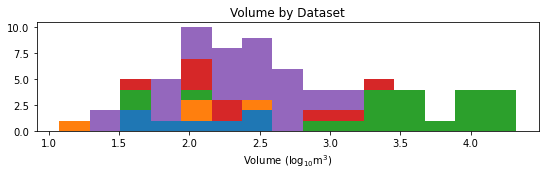

In [3]:
datasets = rir_3_df['dataset'].unique()
unique_rooms = rir_3_df.drop_duplicates('room')
fig = plt.figure(figsize=(9,2))
bins = 15
log_vols = []
for dataset in datasets:
    sub_df = unique_rooms[unique_rooms['dataset']==dataset]
    vols = sub_df['vol'].to_numpy()
    log_vols.append(np.log10(vols))

labels = ["ACE", "AIR", "OpenAIR", "BUT ReverbDB", "Simulated", "Original Measurements "]
plt.hist(log_vols, bins=bins, stacked=True, label=labels)
plt.xlabel(r"Volume (log$_{10}$m$^3$)")
#plt.legend()
plt.title("Volume by Dataset")

Text(0.5, 1.0, 'RT60 by Dataset')

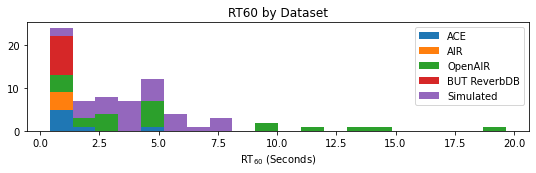

In [4]:
datasets = rir_3_df['dataset'].unique()
unique_rooms = rir_3_df.drop_duplicates('room')
fig = plt.figure(figsize=(9,2))
bins = 20
rt60s_all = []
for dataset in datasets:
    sub_df = unique_rooms[unique_rooms['dataset']==dataset]
    rt60s = sub_df['mean_rt60'].to_numpy()
    rt60s_all.append(rt60s)

labels = ["ACE", "AIR", "OpenAIR", "BUT ReverbDB", "Simulated", "Original Measurements "]
plt.hist(rt60s_all, bins=bins, stacked=True, label=labels)
plt.xlabel(r"RT$_{60}$ (Seconds)")
plt.legend()
plt.title("RT60 by Dataset")

In [5]:
rir_3_df.drop_duplicates('room').value_counts('dataset')

dataset
080322_pra      30
openair         22
BUT_ReverbDB     9
ace              7
air              4
dtype: int64

In [6]:
rir_3_df.drop_duplicates('room').count()

Unnamed: 0.1     72
Unnamed: 0       72
index            72
file             72
room             72
dataset          72
vol              72
computed_rt60    71
mean_rt60        72
dtype: int64

In [7]:
feat_df_path = "/home/cxw/sonos_rirs/features/081522_20k/081522_20k_prop0/feature_df.csv"
feat_df = pd.read_csv(feat_df_path)
feat_df.columns

Index(['Unnamed: 0.1', 'file_speech', 'length (s)', 'Unnamed: 0', 'file_rir',
       'room', 'dataset', 'vol', 'snr', 'clip_label', 'file_clip',
       'computed_rt60', 'rt60', 'file_feature', 'split'],
      dtype='object')

In [8]:
train_feats = feat_df[feat_df['split']=='train']

In [9]:
feat_df['split'].value_counts()

train    3973
test      585
val       442
Name: split, dtype: int64

In [10]:
feat_example = np.load(feat_df.sample(1)['file_feature'].iloc[0])

/tmp/ipykernel_1195366/2490509576.py:1: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(np.log(np.abs(feat_example['feat'])))


(0.0, 1997.0, 0.0, 44.0)

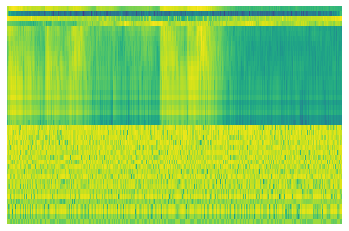

In [11]:
plt.pcolormesh(np.log(np.abs(feat_example['feat'])))
plt.grid(False)
plt.axis('off')

In [26]:
audio_df = pd.read_csv('/home/cxw/sonos_rirs/reverb_audio/081522_20K/audio_df.csv')

In [27]:
audio_df['clip_label']

0     clip0_snr_clean
1      clip0_snr_20db
2      clip0_snr_10db
3       clip0_snr_0db
4     clip1_snr_clean
5      clip1_snr_20db
6      clip1_snr_10db
7       clip1_snr_0db
8     clip2_snr_clean
9      clip2_snr_20db
10     clip2_snr_10db
11      clip2_snr_0db
12    clip3_snr_clean
13     clip3_snr_20db
14     clip3_snr_10db
15      clip3_snr_0db
16    clip4_snr_clean
17     clip4_snr_20db
18     clip4_snr_10db
19      clip4_snr_0db
20    clip5_snr_clean
21     clip5_snr_20db
22     clip5_snr_10db
23      clip5_snr_0db
24    clip6_snr_clean
25     clip6_snr_20db
26     clip6_snr_10db
27      clip6_snr_0db
28    clip7_snr_clean
29     clip7_snr_20db
30     clip7_snr_10db
31      clip7_snr_0db
32    clip8_snr_clean
33     clip8_snr_20db
34     clip8_snr_10db
35      clip8_snr_0db
36    clip9_snr_clean
37     clip9_snr_20db
38     clip9_snr_10db
39      clip9_snr_0db
Name: clip_label, dtype: object

Loading model info 101222_vol/prop1_vol_101222...
Building test dataloader from /home/cxw/sonos_rirs/features/080122_5k_phase/feature_df.csv...
Loading model weights from /home/cxw/sonos_rirs/101222_vol/prop1_vol_101222/model_state.pt...
Running predictions...


100%|████████████████████████████████████████| 585/585 [00:04<00:00, 137.65it/s]


Plotting 585 points...
Plotting...


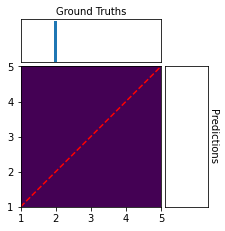

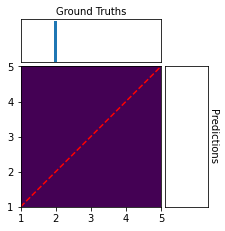

In [29]:
experiment_name = '101222_vol'
model_name = 'prop1_vol_101222'
evaluation.generate_confusion_plot(experiment_name, model_name, split='test', figside=3,\
                            bounds=[1,5], log=True)

Loading model info 101222_vol/prop1_vol_101222...
Building val dataloader from /home/cxw/sonos_rirs/features/080122_5k_phase/feature_df.csv...
Loading model weights from /home/cxw/sonos_rirs/101222_vol/prop1_vol_101222/model_state.pt...
Running predictions...


100%|████████████████████████████████████████| 442/442 [00:02<00:00, 193.30it/s]


Plotting 442 points...
Plotting...


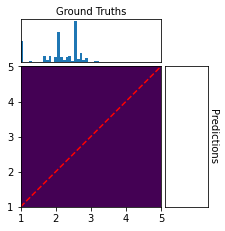

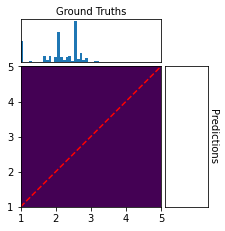

In [30]:
evaluation.generate_confusion_plot(experiment_name, model_name, split='val', figside=3,\
                            bounds=[1,5], log=True)

Loading model info 101222_vol/prop1_vol_101222...
Building train dataloader from /home/cxw/sonos_rirs/features/080122_5k_phase/feature_df.csv...
Loading model weights from /home/cxw/sonos_rirs/101222_vol/prop1_vol_101222/model_state.pt...
Running predictions...


100%|██████████████████████████████████████| 3973/3973 [00:19<00:00, 200.67it/s]


Plotting 3973 points...
Plotting...


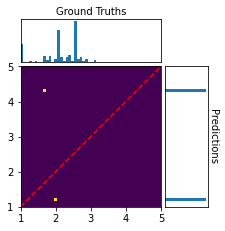

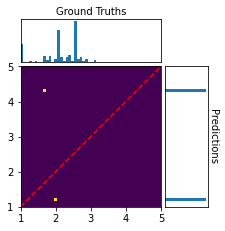

In [31]:
evaluation.generate_confusion_plot(experiment_name, model_name, split='train', figside=3,\
                            bounds=[1,5], log=True)